In [1]:
import pandas as pd
import numpy as np

raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
 index_col=0, parse_dates=True).dropna()

In [2]:
data = pd.DataFrame(raw['XAU='])
data.rename(columns={'XAU=': 'price'}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [3]:
data

,price,returns
Date,,
2010-01-04,1120.0000,NaN
2010-01-05,1118.6500,-0.001206
2010-01-06,1138.5000,0.017589
2010-01-07,1131.9000,-0.005814
2010-01-08,1136.1000,0.003704
...,...,...
2019-12-24,1498.8100,0.009075
2019-12-26,1511.2979,0.008297
2019-12-27,1510.4167,-0.000583


<Axes: xlabel='Date'>

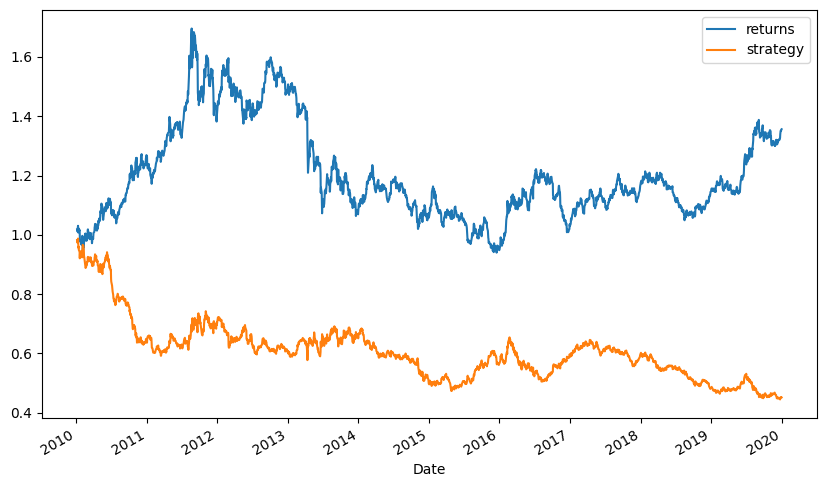

In [4]:
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

In [ ]:
data['position'] = np.sign(data['returns'].rolling(3).mean())